## Product detection

#### let's start with baseline model which is simple model like LeNet-5

Useful Packages

In [ ]:
import numpy as np
import pandas as pd
import cv2
import os

import tensorflow as tf
import tensorflow.keras.layers as tfl
from keras.utils import to_categorical

import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
train_path = []
i = -1 # Exclude root directory
for dirname, _, filenames in os.walk('../input/shopee-code-league-20/_DA_Product_Detection/train/train'):
    i += 1
    for filename in filenames:
        if (filename[-3:] == 'jpg'):
            train_path.append(os.path.join(dirname, filename))
    print('Processing... : ', str(i), '/42', end='\r')

Original image size is 640 x 640 x 3 (RGB)

In [ ]:
imagSize = (32,32)
X_train = []
Y_train = []
for img_path in tqdm(train_path):
    label = img_path.split(os.path.sep)[-2]
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, imagSize)

    X_train.append(image)
    Y_train.append(int(label))

In [ ]:
print(len(X_train))
print(len(Y_train))
print(str(train_path[0].split(os.path.sep)[-1]), " ---> belong to class ", str(Y_train[0]))

In [ ]:
# Convert training data to array and convert numerical number to one-hot vector
X_train = np.array(X_train).astype('float32')/255.0
Y_train = to_categorical(Y_train)

In [ ]:
# One-hot vector
print(Y_train[0])

## Creating model via keras sequential

In [ ]:
input_shape = (32,32,3)

In [ ]:
model = tf.keras.Sequential([])

In [ ]:
X_train[0].shape

In [ ]:
from keras import backend as K
K.set_image_data_format('channels_last')

In [ ]:
model.add(tfl.Conv2D(filters=6, kernel_size=(5,5),activation='relu', input_shape=input_shape))
model.add(tfl.MaxPooling2D(strides=2))
model.add(tfl.Conv2D(filters=16, kernel_size=(5,5), activation='relu'))
model.add(tfl.MaxPooling2D(strides=2))
model.add(tfl.Conv2D(filters=120, kernel_size=(5,5), activation='relu'))
model.add(tfl.Flatten())
model.add(tfl.Dense(84, activation='relu'))
model.add(tfl.Dense(42, activation='softmax'))

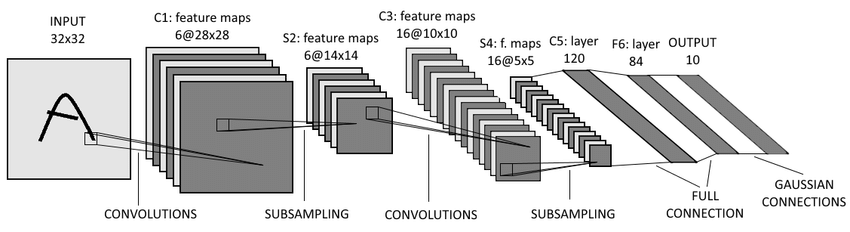

In [ ]:
model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
history = model.fit(X_train, Y_train, epochs=100, batch_size=32)